이 튜토리얼은 UMAP 의 official tutorial 을 바탕으로, 파이썬과 이미지 관련 이야기를 더하여 제작되었습니다.

MNIST 는 0 ~ 9 까지 10 종류의 손글씨 숫자로 이뤄진 데이터셋입니다. 이미지 분류의 대표적인 toy data 로 이용되고 있습니다. Fashion-MNIST 는 10 종류의 의류관련 이미지들을 모아둔 데이터셋입니다. 이미지는 28 x 28 크기의 흑백이미지로, 손글씨 숫자데이터 MNIST 와 같은 형식입니다. 이 데이터는 아래의 github repository 를 복사하여 이용할 수 있습니다.

https://github.com/zalandoresearch/fashion-mnist

Repository 내의 `data/fashion/` 폴더에는 압축된 형식으로 총 7만장의 10종류의 이미지가 포함되어 있으며, `utils/` 폴더에는 이 데이터를 로딩하는 유틸함수가 포함되어 있습니다. 그런데 이 폴더의 함수를 import 하기 위해서는 다운로드 받은 fashion-MNIST 의 위치를 등록해야 합니다.

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='poster')

파이썬에서 import 를 수행하는 원리는 sys.path 에 등록되어 있는 모든 폴더들을 순차적으로 돌아다니며 해당이름의 패키지가 존재하는지 확인합니다. 만약 패키지가 존재하면 이를 import 합니다. 존재하지 않으면 다음 위치로 이동하여 패키지를 탐색합니다. 모든 path 를 확인하여도 해당 이름의 패키지가 존재하지 않는다면 import fail 을 알려줍니다.

sys.path 에는 './' 가 가장 먼저 등록되어 있습니다. 파이썬 파일, 혹은 IPython notebook 파일이 실행되는 폴더를 최우선순위로 패키지를 탐색합니다. 그 뒤 site_packages 폴더를 확인합니다. site_packages 폴더는 pip install 을 이용하여 설치한 패키지들이 모두 모여있는 곳입니다. 이들은 sys.path 에 기본으로 등록되는 주소이기 때문에 어느 위치에서 파이썬 파일을 실행하여도 pip 으로 설치한 패키지가 import 되는 것입니다. 만약 site_packages 가 아닌 다른 위치에 존재하는 패키지를 이용하려면 해당 패키지의 주소를 sys.path 에 등록하면 됩니다. 아래의 `sys.path.append()` 는 유틸 함수가 존재하는 패키지 위치를 sys.path 에 추가한다는 의미입니다.

아래의 `mnist_utils_path` 와 `mnist_data_path` 는 각자가 다운로드 받은 Fashion-MNIST repository 주소로 수정하시기 바랍니다.

In [2]:
mnist_utils_path = '../../../../fashion-mnist/utils/'
mnist_data_path  = '../../../../fashion-mnist/data/fashion/'
sys.path.append(mnist_utils_path)

In [3]:
from mnist_reader import load_mnist

train, train_labels = load_mnist(mnist_data_path, kind='train')
test, test_labels   = load_mnist(mnist_data_path, kind='t10k')

print(train.shape)
print(train_labels.shape)
print(test.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])

UMAP 을 이용하여 임베딩을 수행합니다.

In [5]:
%%time

import umap
embedding = umap.UMAP(n_neighbors=5).fit_transform(data)

CPU times: user 1min 51s, sys: 24 s, total: 2min 15s
Wall time: 1min 8s


`fit_transform()` 함수의 return type 은 numpy.ndarray 입니다.

In [6]:
type(embedding)

numpy.ndarray

앞으로 여러번 그림을 그릴테니 미리 함수를 만들어둡니다. scatterplot 의 오른쪽에 color bar 를 만들기 위한 코드는 matplotlib 을 이용해야만 합니다. 이 부분은 official tutorial 의 코드를 대부분 이용합니다.

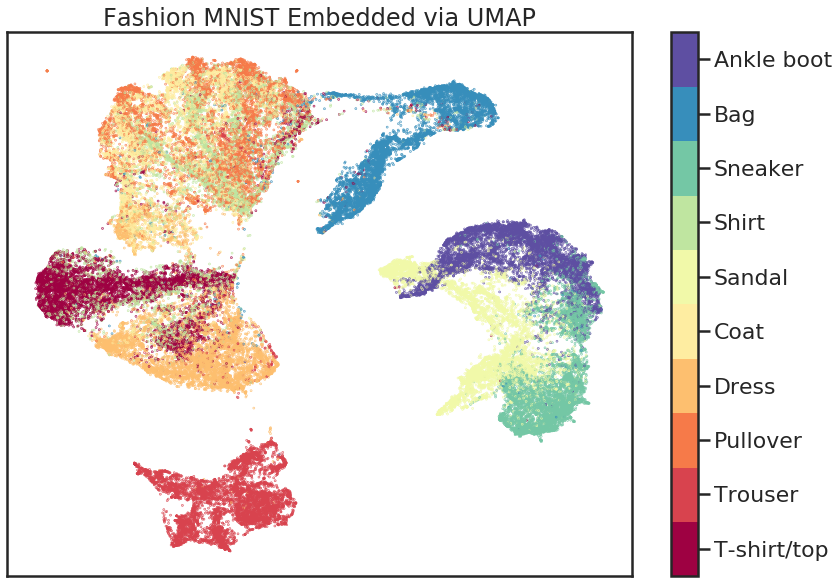

In [7]:
def draw_scatterplot(xy, target, title):
    classes = 'T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot'.split(',')
    fig, ax = plt.subplots(1, figsize=(14, 10))
    plt.scatter(xy[:,0], xy[:,1], s=0.3, c=target, cmap='Spectral', alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(classes)
    plt.title(title)
    return fig

title = 'Fashion MNIST Embedded via UMAP'
fig = draw_scatterplot(embedding, target, title)
fig.savefig('./figures/umap_fashion_mnist_unsuper.png')

`fit_transform()` 함수에 X 와 y 를 모두 넣으면 supervised embedding 을 할 수 있습니다. 학습시간이 훨씬 길어집니다.

In [8]:
%%time
embedding = umap.UMAP().fit_transform(data, y=target)

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 3min 26s, sys: 55.7 s, total: 4min 21s
Wall time: 2min 9s


클래스 정보를 학습에 함께 이용하니 각 클래스별로 점들이 서로 구분되어 임베딩이 학습되었습니다.

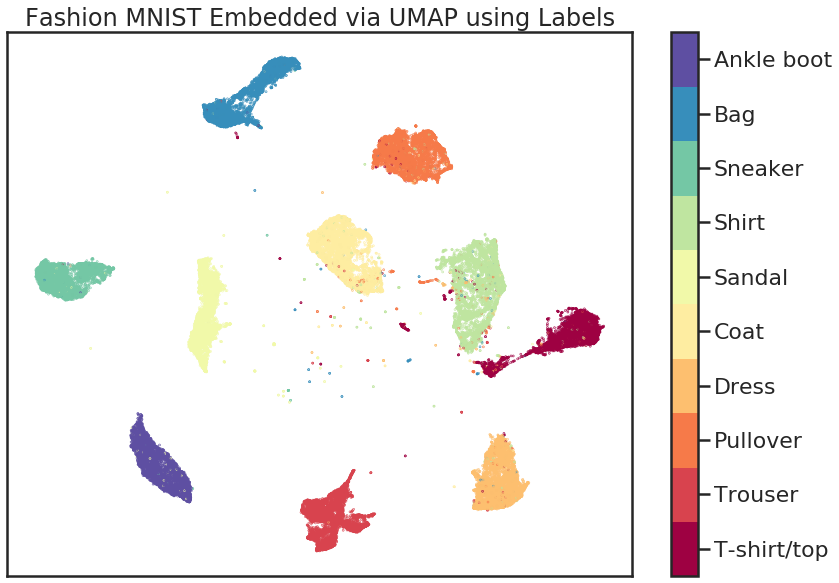

In [9]:
title = 'Fashion MNIST Embedded via UMAP using Labels'
fig = draw_scatterplot(embedding, target, title)
fig.savefig('./figures/umap_fashion_mnist_super.png')

데이터의 일부 (1/7)의 레이블을 -1 로 지정합니다. 이 이미지들은 unlabeled 이고, 나머지 6/7 은 여전히 labeled image 입니다. 이들을 한번에 학습할 수도 있습니다.

In [10]:
masked_target = target.copy().astype(np.int8)
masked_target[np.random.choice(70000, size=10000, replace=False)] = -1

`fit()` 함수의 return type 은 UMAP class instance 입니다. 그 안의 `embedding_` 이라는 attribute 가 numpy.ndarray 입니다.

In [11]:
%%time

fitter = umap.UMAP().fit(data, y=masked_target)
embedding = fitter.embedding_

CPU times: user 2min 54s, sys: 42 s, total: 3min 36s
Wall time: 2min 5s


In [12]:
type(fitter)

umap.umap_.UMAP

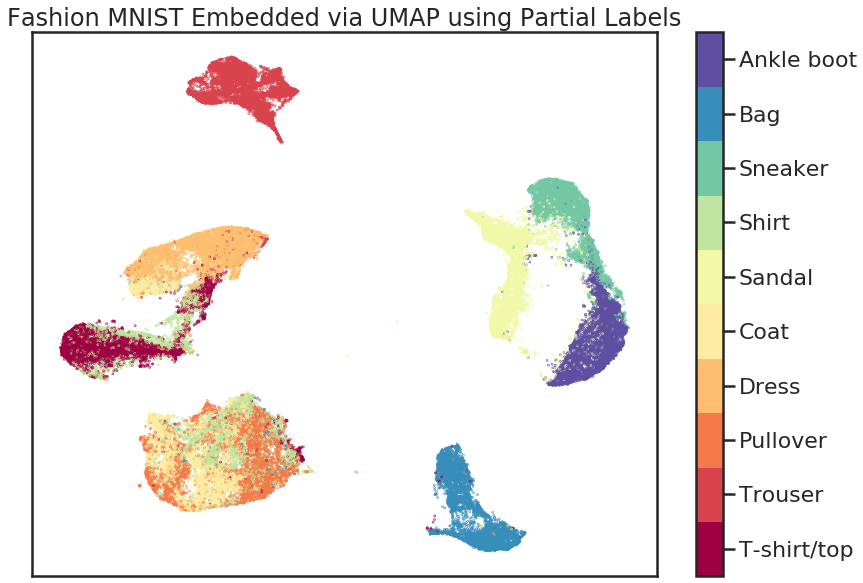

In [13]:
title = 'Fashion MNIST Embedded via UMAP using Partial Labels'
fig = draw_scatterplot(embedding, target, title)
fig.savefig('./figures/umap_fashion_mnist_semisuper.png')

In [14]:
train_data = np.array(train)
test_data = np.array(test)

UMAP 은 일부 데이터로 임베딩 공간을 학습하고, 테스트 데이터의 임베딩 값을 추측할 수도 있습니다. 우선 학습데이터만을 이용하여 UMAP 을 학습합니다.

In [15]:
%%time
mapper = umap.UMAP(n_neighbors=10).fit(train_data, np.array(train_labels))

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 2min 22s, sys: 42.7 s, total: 3min 5s
Wall time: 1min 31s


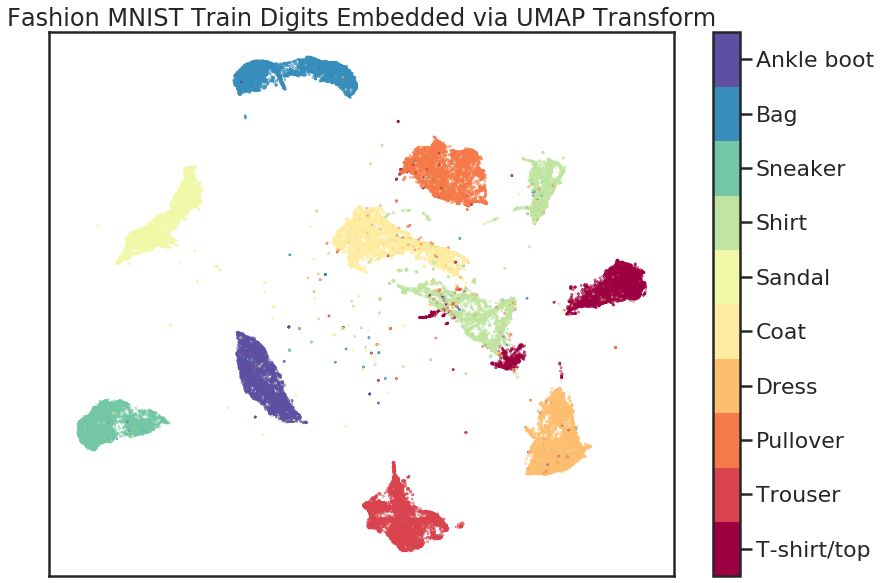

In [16]:
title = 'Fashion MNIST Train Digits Embedded via UMAP Transform'
fig = draw_scatterplot(mapper.embedding_, np.array(train_labels), title)
fig.savefig('./figures/umap_fashion_mnist_mapper.png')

`transform()` 함수에 테스트 데이터를 입력하면 테스트 데이터에 대한 임베딩벡터를 얻을 수 있습니다.

In [17]:
%%time
test_embedding = mapper.transform(test_data)

CPU times: user 13.1 s, sys: 56 ms, total: 13.1 s
Wall time: 9.37 s


이들 역시 클래스가 어느 정도 구분된 데이터임을 확인할 수 있습니다.

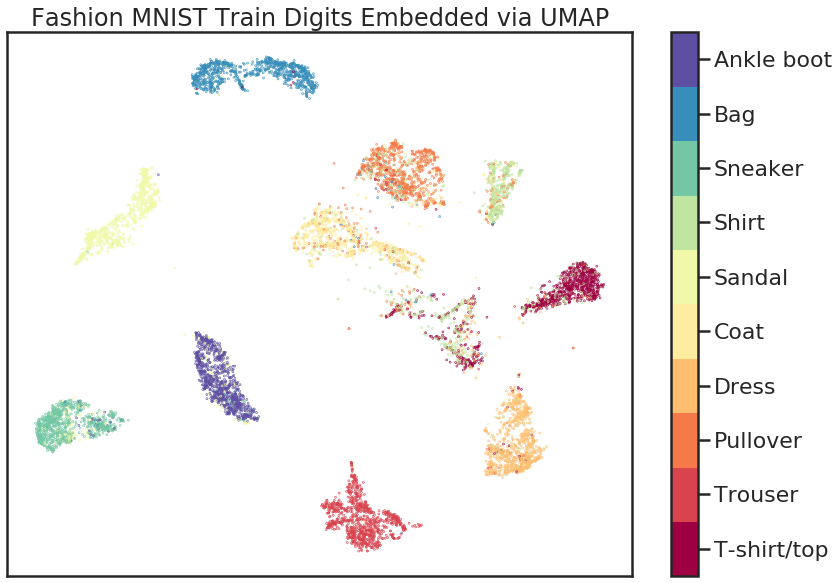

In [18]:
title = 'Fashion MNIST Train Digits Embedded via UMAP'
fig = draw_scatterplot(test_embedding, np.array(test_labels), title)
fig.savefig('./figures/umap_fashion_mnist_test_embedding.png')